## Consumption

#### Prepare Data

In [1461]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [1462]:
consumption = pd.read_csv('product_sums.csv')

In [1463]:
consumption.head()

Unnamed: 0                   Product        Week         value
0           0  04 Total King's Hawaiian  2015-01-11  1.212313e+06
1           1  04 Total King's Hawaiian  2015-01-18  1.203549e+06
2           2  04 Total King's Hawaiian  2015-01-25  1.160706e+06
3           3  04 Total King's Hawaiian  2015-02-01  1.452439e+06
4           4  04 Total King's Hawaiian  2015-02-08  1.305004e+06

In [1464]:
tc = consumption.loc[consumption['Week'] >= '2015-12-31']

In [1465]:
len(tc)

246

### Load in media

In [1466]:
media = pd.read_csv('media_DB.csv',index_col=0)

In [1467]:
media.head()

Media        Date  Week  AMT Media Type  Year  \
0            Academy Awards :30  2015-12-28    53  0.0         TV  2015   
1     GMA Summer Concert (Prod)  2015-12-28    53  0.0         TV  2015   
2       GMA Summer Concert (TV)  2015-12-28    53  0.0         TV  2015   
3  GMA Summer Concert (Digital)  2015-12-28    53  0.0    DIGITAL  2015   
4                        GMA TV  2015-12-28    53  0.0         TV  2015   

   Month  Quarter  
0     12        4  
1     12        4  
2     12        4  
3     12        4  
4     12        4

In [1468]:
media_spend = media[['Date', 'AMT', 'Media Type']]

### Start working with data

### Merging media spend and consumption by week

In [1469]:
media_spend = media_spend.loc[media_spend['Date'] > '2015-12-31']

In [1470]:
media_spend['Month'] = pd.DatetimeIndex(media_spend['Date']).month
media_spend['Year'] = pd.DatetimeIndex(media_spend['Date']).year

In [1471]:
media_spend = media_spend.drop_duplicates()

In [1472]:
week_cat_spend = media_spend.groupby(['Media Type', 'Date', 'Month']).agg({'AMT':'mean'})

ovr_weekly_spend = media_spend.groupby(['Date']).agg({'AMT':'sum'}).reset_index()

len(media_spend['Date'].unique())

253

In [1473]:
ows = ovr_weekly_spend.iloc[:len(tc['Week'].unique()), :]

In [1474]:
ows

Date            AMT
0    2016-01-04       0.000000
1    2016-01-11       0.000000
2    2016-01-18       0.000000
3    2016-01-25  392668.929619
4    2016-02-01  792668.929619
..          ...            ...
241  2020-09-28  335142.750000
242  2020-10-05  335561.300000
243  2020-10-12  157140.600000
244  2020-10-19  141917.950000
245  2020-10-26    1600.000000

[246 rows x 2 columns]

In [1475]:
weekly_consumption = tc.reset_index().iloc[:,2:]
weekly_consumption

Product        Week         value
0    04 Total King's Hawaiian  2016-01-03  1.832602e+06
1    04 Total King's Hawaiian  2016-01-10  1.307039e+06
2    04 Total King's Hawaiian  2016-01-17  1.253305e+06
3    04 Total King's Hawaiian  2016-01-24  1.285195e+06
4    04 Total King's Hawaiian  2016-01-31  1.167300e+06
..                        ...         ...           ...
241  04 Total King's Hawaiian  2020-08-16  1.817414e+06
242  04 Total King's Hawaiian  2020-08-23  1.833578e+06
243  04 Total King's Hawaiian  2020-08-30  1.833123e+06
244  04 Total King's Hawaiian  2020-09-06  2.249057e+06
245  04 Total King's Hawaiian  2020-09-13  1.977759e+06

[246 rows x 3 columns]

### Give each date a number and then match on those numbers

In [1476]:
ows['Date Rank'] = 0
for row in range(1, len(ows)+1): 
    ows.loc[row-1, 'Date Rank'] = row

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1477]:
weekly_consumption['Date Rank'] = 0
for row in range(1, len(weekly_consumption)+1):
    weekly_consumption.loc[row-1, 'Date Rank'] = row

In [1478]:
weekly_consumption

Product        Week         value  Date Rank
0    04 Total King's Hawaiian  2016-01-03  1.832602e+06          1
1    04 Total King's Hawaiian  2016-01-10  1.307039e+06          2
2    04 Total King's Hawaiian  2016-01-17  1.253305e+06          3
3    04 Total King's Hawaiian  2016-01-24  1.285195e+06          4
4    04 Total King's Hawaiian  2016-01-31  1.167300e+06          5
..                        ...         ...           ...        ...
241  04 Total King's Hawaiian  2020-08-16  1.817414e+06        242
242  04 Total King's Hawaiian  2020-08-23  1.833578e+06        243
243  04 Total King's Hawaiian  2020-08-30  1.833123e+06        244
244  04 Total King's Hawaiian  2020-09-06  2.249057e+06        245
245  04 Total King's Hawaiian  2020-09-13  1.977759e+06        246

[246 rows x 4 columns]

In [1479]:
merged = pd.merge(weekly_consumption, ows, on = 'Date Rank')

In [1480]:
merged = merged.drop('Product', axis = 1)

In [1481]:
merged.columns = ['Week', 'Total Consumption', 'Date Rank', 'Drop', 'Total Media Spend']

In [1482]:
merged = merged.drop('Drop', axis = 1)

In [1483]:
merged = merged.iloc[:243,:]

In [1484]:
merged

Week  Total Consumption  Date Rank  Total Media Spend
0    2016-01-03       1.832602e+06          1       0.000000e+00
1    2016-01-10       1.307039e+06          2       0.000000e+00
2    2016-01-17       1.253305e+06          3       0.000000e+00
3    2016-01-24       1.285195e+06          4       3.926689e+05
4    2016-01-31       1.167300e+06          5       7.926689e+05
..          ...                ...        ...                ...
238  2020-07-26       1.772376e+06        239       1.028144e+06
239  2020-08-02       1.760003e+06        240       6.928861e+05
240  2020-08-09       1.846151e+06        241       5.040058e+05
241  2020-08-16       1.817414e+06        242       3.351428e+05
242  2020-08-23       1.833578e+06        243       3.355613e+05

[243 rows x 4 columns]

In [1485]:
merged.corr()

Total Consumption  Date Rank  Total Media Spend
Total Consumption           1.000000   0.190252          -0.100069
Date Rank                   0.190252   1.000000           0.053880
Total Media Spend          -0.100069   0.053880           1.000000

### Calculate the 13 wk avg of consumption for each week of media spend and test correlation

In [1486]:
merged['13_wk_avg'] = 0
for week in range(0, len(merged)-13):
    merged.loc[week, '13_wk_avg'] = merged.loc[week+1:week+14, 'Total Consumption'].mean()

In [1487]:
wk13 = merged.iloc[:len(merged)-13, :]

In [1488]:
wk13

Week  Total Consumption  Date Rank  Total Media Spend     13_wk_avg
0    2016-01-03       1.832602e+06          1           0.000000  1.472657e+06
1    2016-01-10       1.307039e+06          2           0.000000  1.476223e+06
2    2016-01-17       1.253305e+06          3           0.000000  1.481213e+06
3    2016-01-24       1.285195e+06          4      392668.929619  1.485759e+06
4    2016-01-31       1.167300e+06          5      792668.929619  1.509340e+06
..          ...                ...        ...                ...           ...
225  2020-04-26       1.893788e+06        226       22081.250000  1.890227e+06
226  2020-05-03       1.873758e+06        227       34443.250000  1.888255e+06
227  2020-05-10       1.933135e+06        228      683934.140000  1.879989e+06
228  2020-05-17       1.759824e+06        229      931356.056454  1.885258e+06
229  2020-05-24       2.036224e+06        230      848965.804454  1.873645e+06

[230 rows x 5 columns]

In [1489]:
wk13.corr()

Total Consumption  Date Rank  Total Media Spend  13_wk_avg
Total Consumption           1.000000   0.204331          -0.106209   0.107040
Date Rank                   0.204331   1.000000           0.013219   0.423105
Total Media Spend          -0.106209   0.013219           1.000000  -0.004717
13_wk_avg                   0.107040   0.423105          -0.004717   1.000000

### Now do this for all the different media types

In [1490]:
media_types = list(media_spend['Media Type'].unique())
media_types

['TV',
 'DIGITAL',
 'PRINT',
 'VOD',
 'RADIO',
 'SPONSORSHIP',
 'BASEBALL',
 'BILLBOARD',
 'INFLUENCERS/DIGITAL',
 'INFLUENCER']

In [1491]:
monthly_consumption = weekly_consumption.drop('Product', axis = 1)
monthly_consumption['Month'] = pd.DatetimeIndex(monthly_consumption['Week']).month
monthly_consumption['Year'] = pd.DatetimeIndex(monthly_consumption['Week']).year

In [1492]:
monthly_consumption = monthly_consumption.drop('Date Rank', axis = 1)

In [1493]:
monthly_consumption = monthly_consumption.groupby(['Year', 'Month']).agg({'value':'sum'}).reset_index().rename(columns = {'value':'Monthly Consumption'})
monthly_consumption

Year  Month  Monthly Consumption
0   2016      1         6.845440e+06
1   2016      2         5.582913e+06
2   2016      3         6.963284e+06
3   2016      4         5.738292e+06
4   2016      5         7.252815e+06
5   2016      6         5.752177e+06
6   2016      7         7.299034e+06
7   2016      8         5.615529e+06
8   2016      9         5.828230e+06
9   2016     10         7.105767e+06
10  2016     11         1.273420e+07
11  2016     12         1.120894e+07
12  2017      1         8.020081e+06
13  2017      2         6.191383e+06
14  2017      3         5.726407e+06
15  2017      4         9.217823e+06
16  2017      5         5.937119e+06
17  2017      6         5.874390e+06
18  2017      7         7.506389e+06
19  2017      8         5.811155e+06
20  2017      9         6.263823e+06
21  2017     10         7.380857e+06
22  2017     11         1.338877e+07
23  2017     12         1.400362e+07
24  2018      1         5.918093e+06
25  2018      2         6.273803e+06
26  2018      3         6.102814e+06
27  2018      4         9.534237e+06
28  2018      5         6.307460e+06
29  2018      6         6.287638e+06
30  2018      7         8.213433e+06
31  2018      8         6.034962e+06
32  2018      9         8.024399e+06
33  2018     10         6.253694e+06
34  2018     11         1.396118e+07
35  2018     12         1.446445e+07
36  2019      1         6.583778e+06
37  2019      2         6.441107e+06
38  2019      3         7.552271e+06
39  2019      4         8.723088e+06
40  2019      5         6.964340e+06
41  2019      6         8.193127e+06
42  2019      7         6.725434e+06
43  2019      8         6.484241e+06
44  2019      9         8.582184e+06
45  2019     10         6.446926e+06
46  2019     11         9.769092e+06
47  2019     12         2.032256e+07
48  2020      1         6.736174e+06
49  2020      2         7.013208e+06
50  2020      3         1.115652e+07
51  2020      4         9.369658e+06
52  2020      5         9.367418e+06
53  2020      6         7.302470e+06
54  2020      7         8.033289e+06
55  2020      8         9.090270e+06
56  2020      9         4.226816e+06

In [1494]:
media_spend

Date      AMT  Media Type  Month  Year
12    2016-01-04      0.0          TV      1  2016
15    2016-01-04      0.0     DIGITAL      1  2016
18    2016-01-04      0.0       PRINT      1  2016
21    2016-01-04      0.0         VOD      1  2016
22    2016-01-04      0.0       RADIO      1  2016
...          ...      ...         ...    ...   ...
7457  2020-12-14      0.0       PRINT     12  2020
7458  2020-12-14      0.0   BILLBOARD     12  2020
7459  2020-12-14      0.0  INFLUENCER     12  2020
7460  2020-12-14      0.0     DIGITAL     12  2020
7482  2020-12-14  14519.0     DIGITAL     12  2020

[3377 rows x 5 columns]

In [1495]:
mt_dict = {}
for mt in media_types:
    mt_dict[mt] = media_spend.loc[media_spend['Media Type'] == mt].groupby(['Year', 'Month']).agg({'AMT':'sum'}).rename(columns = {'AMT':'Monthly Media Spend'}).reset_index()

In [1496]:
for key in mt_dict:
    df = mt_dict[key]
    new_df = pd.merge(monthly_consumption, df, on = ['Year', 'Month'])
    
    mt_dict[key] = new_df

In [1497]:
for mt in media_types:
    print(mt, round(mt_dict[mt].corr().iloc[2,3],2))

TV -0.06
DIGITAL -0.17
PRINT -0.04
VOD -0.07
RADIO -0.11
SPONSORSHIP -0.22
BASEBALL -0.31
BILLBOARD 0.54
INFLUENCERS/DIGITAL -0.18
INFLUENCER -0.34


Lag one month:

In [1601]:
for key in mt_dict: 
    df = mt_dict[key]
    for row in range(0, len(df)-1):
        df.loc[row, 'Lagged Monthly Consumption'] = df.loc[row+1,'Monthly Consumption']
    for row in range(0, len(df)):
        df.loc[row, 'Date Rank'] = row+1
    mt_dict[key] = df

In [1602]:
for mt in media_types:
    print(mt, round(mt_dict[mt].corr().iloc[3,4],2))

TV 0.24
DIGITAL -0.06
PRINT -0.15
VOD 0.17
RADIO -0.08
SPONSORSHIP -0.08
BASEBALL -0.29
BILLBOARD 0.21
INFLUENCERS/DIGITAL 0.46
INFLUENCER -0.38


In [1500]:
mt_dict['TV'].head()

Year  Month  Monthly Consumption  Monthly Media Spend  \
0  2016      1         6.845440e+06         3.629915e+05   
1  2016      2         5.582913e+06         3.914958e+06   
2  2016      3         6.963284e+06         1.088975e+06   
3  2016      4         5.738292e+06         1.649581e+06   
4  2016      5         7.252815e+06         2.211603e+06   

   Lagged Monthly Consumption  Date Rank  
0                5.582913e+06        1.0  
1                6.963284e+06        2.0  
2                5.738292e+06        3.0  
3                7.252815e+06        4.0  
4                5.752177e+06        5.0

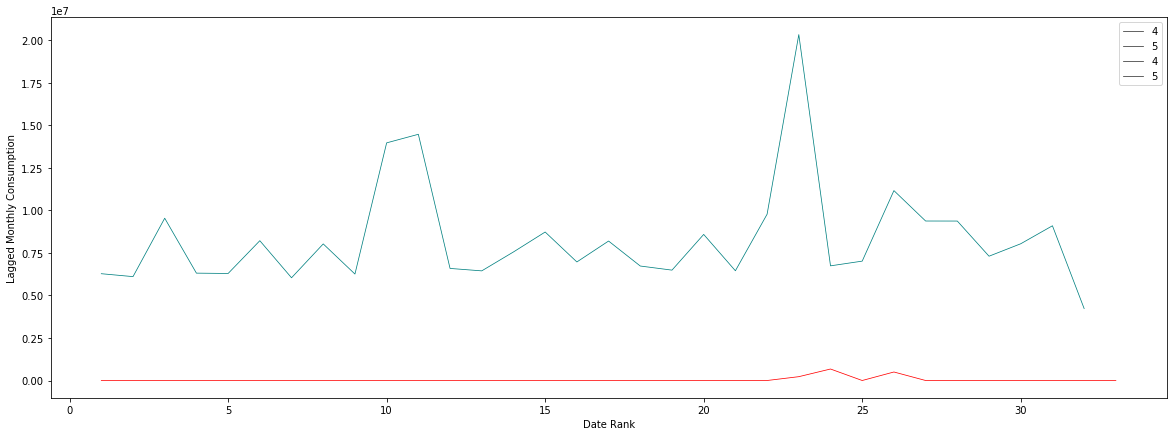

In [1501]:
df = mt_dict['BILLBOARD']
fig = plt.figure(figsize = (20,7))
sns.lineplot(data = df, x = 'Date Rank', y = 'Monthly Media Spend', color = 'red', size = 5)
sns.lineplot(data = df, x = 'Date Rank', y = 'Lagged Monthly Consumption', color = 'teal', size =5)

Lag two months

In [1594]:
for key in mt_dict: 
    df = mt_dict[key]
    for row in range(0, len(df)-2):
        df.loc[row, 'Lagged 2-Month Consumption'] = (df.loc[row+1,'Monthly Consumption'] + df.loc[row+2, 'Monthly Consumption']) / 2

    mt_dict[key] = df

In [1600]:
mt_dict['TV'].corr()

Year     Month  Monthly Consumption  \
Year                        1.000000 -0.107662             0.108889   
Month                      -0.107662  1.000000             0.495909   
Monthly Consumption         0.108889  0.495909             1.000000   
Monthly Media Spend        -0.084576 -0.068334            -0.062180   
Lagged Monthly Consumption  0.123336  0.381831             0.189953   
Date Rank                   0.978988  0.097332             0.210721   
Lagged 2-Month Consumption  0.196848  0.403542             0.017327   

                            Monthly Media Spend  Lagged Monthly Consumption  \
Year                                  -0.084576                    0.123336   
Month                                 -0.068334                    0.381831   
Monthly Consumption                   -0.062180                    0.189953   
Monthly Media Spend                    1.000000                    0.244118   
Lagged Monthly Consumption             0.244118                    1.000000   
Date Rank                             -0.098683                    0.204049   
Lagged 2-Month Consumption             0.122989                    0.767129   

                            Date Rank  Lagged 2-Month Consumption  
Year                         0.978988                    0.196848  
Month                        0.097332                    0.403542  
Monthly Consumption          0.210721                    0.017327  
Monthly Media Spend         -0.098683                    0.122989  
Lagged Monthly Consumption   0.204049                    0.767129  
Date Rank                    1.000000                    0.285405  
Lagged 2-Month Consumption   0.285405                    1.000000

In [1606]:
print(f'Media Type \t\t Two Month Lag \t\t Two Month Lag')

for mt in media_types:
    print(f'{mt}\t\t\t{round(mt_dict[mt].corr().iloc[3,4],2)}\t\t\t{round(mt_dict[mt].corr().iloc[3,6],2)}')
    


Media Type 		 Two Month Lag 		 Two Month Lag
TV			0.24			0.12
DIGITAL			-0.06			-0.04
PRINT			-0.15			0.07
VOD			0.17			-0.07
RADIO			-0.08			-0.15
SPONSORSHIP			-0.08			-0.16
BASEBALL			-0.29			-0.36
BILLBOARD			0.21			0.1
INFLUENCERS/DIGITAL			0.46			0.97
INFLUENCER			-0.38			-0.55


In [1607]:
table = []

for mt in media_types:
    data = [mt, round(mt_dict[mt].corr().iloc[3,4],2),round(mt_dict[mt].corr().iloc[3,6],2)]
    table.append(data)

In [1610]:
correlations = pd.DataFrame(table)

In [1611]:
correlations.columns = ['Media Type', 'One Month Lag', 'Two Month Lag']

In [1620]:
correlations['Lag Average'] = round((correlations['One Month Lag'] + correlations['Two Month Lag']) / 2, 2)

In [1623]:
correlations.to_csv('correlations.csv')

### Inspecting the 2019 Peak

In [1502]:
month11 = media_spend.loc[(media_spend['Month'] == 12) | (media_spend['Month'] == 11)]

In [1503]:
month11 = month11.groupby(['Media Type', 'Year']).agg({'AMT':'sum'}).reset_index()

In [1504]:
other_years = month11.loc[month11['Year'] != 2019]
year2019 = month11.loc[month11['Year'] == 2019].reset_index()

In [1505]:
other_years_grouped = other_years.groupby('Media Type').agg({'AMT':'mean'}).reset_index()

In [1506]:
other_years_grouped['Year'] = 'Other Years'

In [1507]:
compare_2019 = pd.concat([other_years_grouped, year2019])

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [1508]:
compare_2019

AMT           Media Type         Year  index
0  0.000000e+00             BASEBALL  Other Years    NaN
1  0.000000e+00            BILLBOARD  Other Years    NaN
2  1.451900e+04              DIGITAL  Other Years    NaN
3  0.000000e+00           INFLUENCER  Other Years    NaN
4  0.000000e+00  INFLUENCERS/DIGITAL  Other Years    NaN
5  1.600000e+03                PRINT  Other Years    NaN
6  2.695975e+04                RADIO  Other Years    NaN
7  8.442650e+04          SPONSORSHIP  Other Years    NaN
8  1.328025e+06                   TV  Other Years    NaN
9  4.967742e+04                  VOD  Other Years    NaN
0  9.000000e+05            BILLBOARD         2019    2.0
1  1.794280e+05              DIGITAL         2019    7.0
2  0.000000e+00           INFLUENCER         2019    9.0
3  5.499999e+04  INFLUENCERS/DIGITAL         2019   12.0
4  0.000000e+00                PRINT         2019   16.0
5  0.000000e+00                RADIO         2019   21.0
6  0.000000e+00          SPONSORSHIP         2019   26.0
7  4.614981e+06                   TV         2019   31.0
8  2.960321e+05                  VOD         2019   36.0

Text(0, 0.5, 'Media Spend ($)')

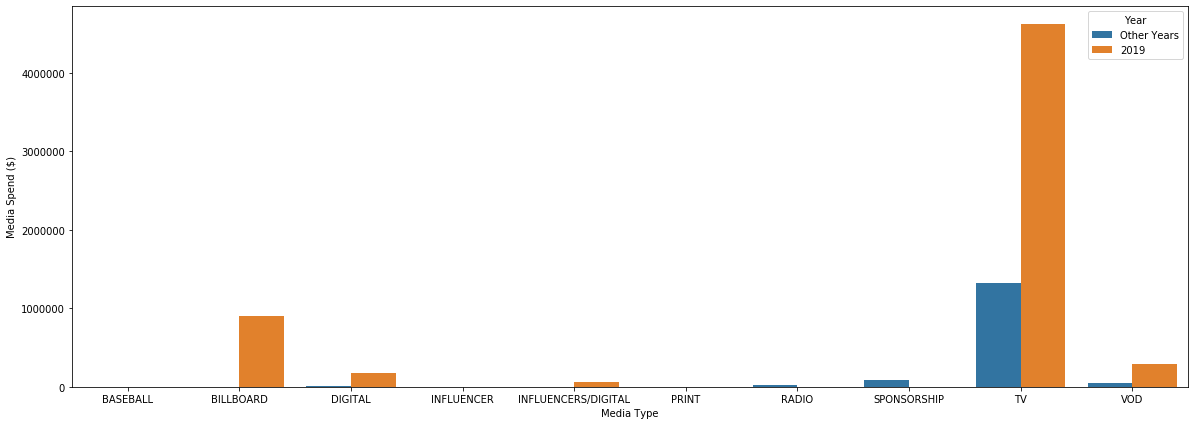

In [1624]:
fig = plt.figure(figsize = (20,7))

sns.barplot(data = compare_2019, x = 'Media Type', y = 'AMT', hue = 'Year')
plt.ylabel('Media Spend ($)')

### Calculating ROS ratios in Dec 2019 vs other years

In [1540]:
for key in mt_dict:
    df = mt_dict[key]
    df['Media Type'] = key
    mt_dict[key] = df

In [1541]:
l = []

for key in mt_dict:
    l.append(mt_dict[key])

In [1542]:
media_master = pd.concat(l).reset_index().drop('index', axis = 1).dropna(axis = 0)

In [1529]:
media_master

Year  Month  Monthly Consumption  Monthly Media Spend  \
0    2016      1         6.845440e+06         3.629915e+05   
1    2016      2         5.582913e+06         3.914958e+06   
2    2016      3         6.963284e+06         1.088975e+06   
3    2016      4         5.738292e+06         1.649581e+06   
4    2016      5         7.252815e+06         2.211603e+06   
..    ...    ...                  ...                  ...   
362  2020      4         9.369658e+06         0.000000e+00   
363  2020      5         9.367418e+06         0.000000e+00   
364  2020      6         7.302470e+06         0.000000e+00   
365  2020      7         8.033289e+06         1.200000e+05   
366  2020      8         9.090270e+06         1.160000e+05   

     Lagged Monthly Consumption  Date Rank  Media Type  
0                  5.582913e+06        1.0          TV  
1                  6.963284e+06        2.0          TV  
2                  5.738292e+06        3.0          TV  
3                  7.252815e+06        4.0          TV  
4                  5.752177e+06        5.0          TV  
..                          ...        ...         ...  
362                9.367418e+06        5.0  INFLUENCER  
363                7.302470e+06        6.0  INFLUENCER  
364                8.033289e+06        7.0  INFLUENCER  
365                9.090270e+06        8.0  INFLUENCER  
366                4.226816e+06        9.0  INFLUENCER  

[358 rows x 7 columns]

In [1543]:
key_months = media_master.loc[(media_master['Month'] == 10) | (media_master['Month'] == 11) | (media_master['Month'] == 12)]

In [1544]:
grouped_key_months = key_months.groupby(['Media Type', 'Year']).agg({'Monthly Media Spend':'sum', 'Monthly Consumption':'sum'}).reset_index()

In [1545]:
gkm2019 = grouped_key_months.loc[grouped_key_months['Year'] == 2019]
gkmother = grouped_key_months.loc[grouped_key_months['Year'] != 2019]

In [1546]:
gkmother['Year'] = 'Other Years'

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1547]:
ROS = pd.concat([gkm2019, gkmother])

In [1550]:
ROSpos = ROS.groupby(['Media Type', 'Year']).agg({'Monthly Media Spend':'sum', 'Monthly Consumption':'sum'}).reset_index()

In [1552]:
ROSpos['ROS'] = ROSpos['Monthly Media Spend'] / ROSpos['Monthly Consumption']

Text(0, 0.5, '$ Spent per Unit Purchased')

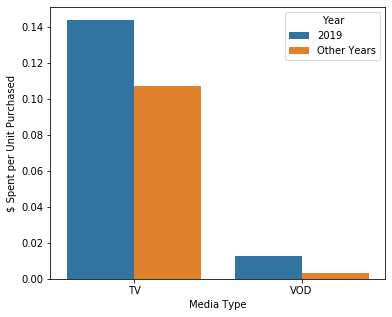

In [1630]:
fig = plt.figure(figsize = (6,5))
ROSpos = ROSpos.loc[(ROSpos['Media Type'] == 'TV') | (ROSpos['Media Type'] == 'VOD')]
sns.barplot(data = ROSpos, x = 'Media Type', y = 'ROS', hue = 'Year', ci = False)
plt.ylabel('$ Spent per Unit Purchased')

In [1583]:
m = media_master.loc[(media_master['Month'] == 11) | (media_master['Month'] == 12)]

In [1584]:
km = m.groupby(['Media Type', 'Year']).agg({'Monthly Consumption':'sum', 'Monthly Media Spend':'sum'}).reset_index()

In [1585]:
km2019 = km.loc[km['Year'] == 2019]
kmother = km.loc[km['Year'] != 2019]

In [1586]:
kmother = kmother.groupby('Media Type').agg({'Monthly Consumption':'mean', 'Monthly Media Spend':'mean'}).reset_index()

In [1587]:
kmother['Year'] = 'Other Years'

In [1588]:
kms = pd.concat([km2019, kmother]).reset_index().drop('index', axis = 1)

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [1591]:
spend_diff = km2019['Monthly Media Spend'].sum() - kmother['Monthly Media Spend'].sum()

In [1592]:
consumption_diff = km2019['Monthly Consumption'].sum() - kmother['Monthly Consumption'].sum()

In [1593]:
spend_diff / consumption_diff

1.2479877368270682